## Distribution of Inter-arrival Time of Outer Calls

### Demo

The distributions are fit and error is determined. The distribution with the least error is returned.

chi (1.2191190322991008, -2.698566715982082, 390.66687918295315)


Text(0, 0.5, 'Frequency')

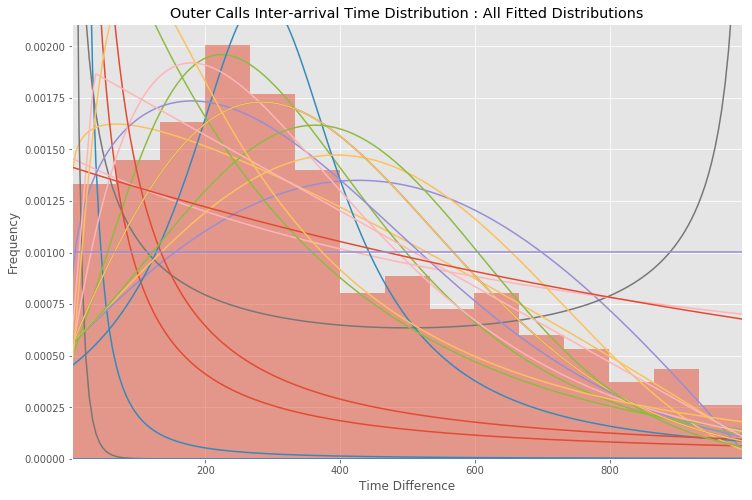

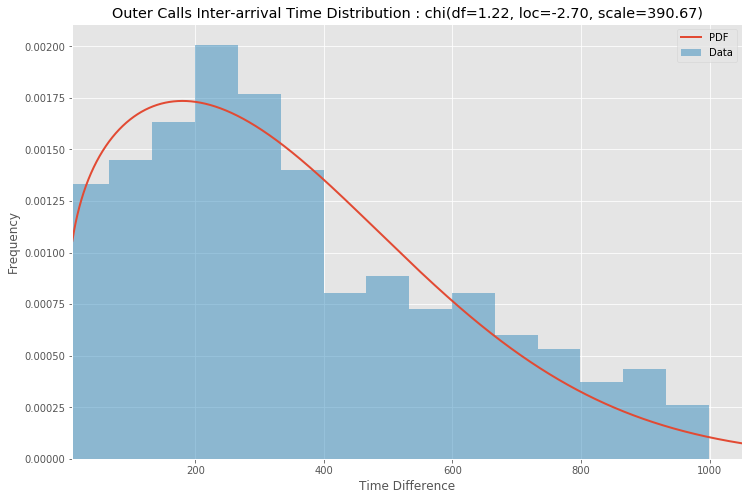

In [20]:
%matplotlib inline

import warnings
import numpy as np
import pandas as pd
import scipy.stats as st
# import statsmodels as sm
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams['figure.figsize'] = (16.0, 12.0)
matplotlib.style.use('ggplot')

# Create models from data
def best_fit_distribution(data, bins=200, ax=None):
    """Model data by finding best fit distribution to data"""
    # Get histogram of original data
    y, x = np.histogram(data, bins=bins, density=True)
    x = (x + np.roll(x, -1))[:-1] / 2.0

    # Distributions to check
    DISTRIBUTIONS = [        
        st.alpha,st.anglit,st.arcsine,st.beta,st.betaprime,st.bradford,st.burr,st.cauchy,st.chi,st.chi2,st.cosine,
#         st.dgamma,st.dweibull,st.erlang,st.expon,st.exponnorm,st.exponweib,st.exponpow,st.f,st.fatiguelife,st.fisk,
#         st.foldcauchy,st.foldnorm,st.frechet_r,st.frechet_l,st.genlogistic,st.genpareto,st.gennorm,
#         st.genextreme,st.gausshyper,st.gamma,st.gengamma,st.genhalflogistic,st.gilbrat,st.gompertz,st.gumbel_r,
#         st.gumbel_l,st.halfcauchy,st.halflogistic,st.halfnorm,st.halfgennorm,st.hypsecant,st.invgamma,st.invgauss,
#         st.invweibull,st.johnsonsb,st.johnsonsu,st.ksone,st.kstwobign,st.laplace,st.levy,st.levy_l,
#         st.logistic,st.loglaplace,st.lognorm,st.lomax,st.maxwell,st.mielke,st.nakagami,st.ncx2,
        st.pareto,st.pearson3,st.powerlognorm,st.powernorm,st.reciprocal,
        st.rayleigh,st.rice,st.t,st.triang,st.truncexpon,st.truncnorm,
        st.uniform,st.vonmises,st.wald
    ]

    # Best holders
    best_distribution = st.norm
    best_params = (0.0, 1.0)
    best_sse = np.inf

    # Estimate distribution parameters from data
    for distribution in DISTRIBUTIONS:
        # Try to fit the distribution
        try:
            # Ignore warnings from data that can't be fit
            with warnings.catch_warnings():
                warnings.filterwarnings('ignore')

                # fit dist to data
                params = distribution.fit(data)

                # Separate parts of parameters
                arg = params[:-2]
                loc = params[-2]
                scale = params[-1]

                # Calculate fitted PDF and error with fit in distribution
                pdf = distribution.pdf(x, loc=loc, scale=scale, *arg)
                sse = np.sum(np.power(y - pdf, 2.0))

                # if axis pass in add to plot
                try:
                    if ax:
                        pd.Series(pdf, x).plot(ax=ax)
                    end
                except Exception:
                    pass

                # identify if this distribution is better
                if best_sse > sse > 0:
                    best_distribution = distribution
                    best_params = params
                    best_sse = sse

        except Exception:
            pass

    return (best_distribution.name, best_params)

def make_pdf(dist, params, size=10000):
    """Generate distributions's Probability Distribution Function """

    # Separate parts of parameters
    arg = params[:-2]
    loc = params[-2]
    scale = params[-1]

    # Get sane start and end points of distribution
    start = dist.ppf(0.01, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.01, loc=loc, scale=scale)
    end = dist.ppf(0.99, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.99, loc=loc, scale=scale)

    # Build PDF and turn into pandas Series
    x = np.linspace(start, end, size)
    y = dist.pdf(x, loc=loc, scale=scale, *arg)
    pdf = pd.Series(y, x)

    return pdf


# Loading data
df = pd.read_csv('OuterCalls/研究大樓_outer_diff_floor_01_down.csv').iloc[:, 1:]
data = df['time_diff'].loc[df['time_diff'] < 1000]

# Plot for comparison
plt.figure(figsize=(12,8))
ax = data.plot(kind='hist', bins=15, density=True, alpha=0.5)
# Save plot limits
dataYLim = ax.get_ylim()

# Find best fit distribution
best_fit_name, best_fit_params = best_fit_distribution(data, 200, ax)
best_dist = getattr(st, best_fit_name)
print(best_fit_name, best_fit_params)
# Update plots
ax.set_ylim(dataYLim)
ax.set_title('Outer Calls Inter-arrival Time Distribution : All Fitted Distributions')
ax.set_xlabel('Time Difference')
ax.set_ylabel('Frequency')

# Make PDF with best params 
pdf = make_pdf(best_dist, best_fit_params)

# Display
plt.figure(figsize=(12,8))
ax = pdf.plot(lw=2, label='PDF', legend=True)
data.plot(kind='hist', bins=15, density=True, alpha=0.5, label='Data', legend=True, ax=ax)

param_names = (best_dist.shapes + ', loc, scale').split(', ') if best_dist.shapes else ['loc', 'scale']
param_str = ', '.join(['{}={:0.2f}'.format(k,v) for k,v in zip(param_names, best_fit_params)])
dist_str = '{}({})'.format(best_fit_name, param_str)

ax.set_title('Outer Calls Inter-arrival Time Distribution : ' + dist_str)
ax.set_xlabel('Time Difference')
ax.set_ylabel('Frequency')

### Result

In [3]:
fitting = pd.DataFrame(columns=['Location', 'Floor', 'Direction', 'Section', 'Distribution', 'Parameters'])
fitting

,Location,Floor,Direction,Section,Distribution,Parameters


In [21]:
import warnings
import numpy as np
import pandas as pd
import scipy.stats as st

def time_difference(time):
    time = pd.to_datetime(time)
    return (time.values[1:]-time.values[:-1])/np.timedelta64(1,'s')

def best_fit_distribution(data, bins=15, ax=None):
    """Model data by finding best fit distribution to data"""
    # Get histogram of original data
    y, x = np.histogram(data, bins=bins, density=True)
    x = (x + np.roll(x, -1))[:-1] / 2.0

    # Distributions to check
    DISTRIBUTIONS = [        
        st.alpha,st.anglit,st.arcsine,st.beta,st.betaprime,st.bradford,st.burr,st.cauchy,st.chi,st.chi2,st.cosine,
        st.dgamma,st.dweibull,st.erlang,st.expon,st.exponnorm,st.exponweib,st.exponpow,st.f,st.fatiguelife,st.fisk,
        st.foldcauchy,st.foldnorm,st.frechet_r,st.frechet_l,st.genlogistic,st.genpareto,st.gennorm,
        st.genextreme,st.gausshyper,st.gamma,st.gengamma,st.genhalflogistic,st.gilbrat,st.gompertz,st.gumbel_r,
        st.gumbel_l,st.halfcauchy,st.halflogistic,st.halfnorm,st.halfgennorm,st.hypsecant,st.invgamma,st.invgauss,
        st.invweibull,st.johnsonsb,st.johnsonsu,st.ksone,st.kstwobign,st.laplace,st.levy,st.levy_l,
        st.logistic,st.loglaplace,st.lognorm,st.lomax,st.maxwell,st.mielke,st.nakagami,st.ncx2,
        st.pareto,st.pearson3,st.powerlognorm,st.powernorm,st.reciprocal,
        st.rayleigh,st.rice,st.t,st.triang,st.truncexpon,st.truncnorm,
        st.uniform,st.vonmises,st.wald
    ]

    # Best holders
    best_distribution = st.norm
    best_params = (0.0, 1.0)
    best_sse = np.inf

    # Estimate distribution parameters from data
    for distribution in DISTRIBUTIONS:

        # Try to fit the distribution
        try:
            # Ignore warnings from data that can't be fit
            with warnings.catch_warnings():
                warnings.filterwarnings('ignore')

                # fit dist to data
                params = distribution.fit(data)

                # Separate parts of parameters
                arg = params[:-2]
                loc = params[-2]
                scale = params[-1]

                # Calculate fitted PDF and error with fit in distribution
                pdf = distribution.pdf(x, loc=loc, scale=scale, *arg)
                sse = np.sum(np.power(y - pdf, 2.0))

                # if axis pass in add to plot
                try:
                    if ax:
                        pd.Series(pdf, x).plot(ax=ax)
                    end
                except Exception:
                    pass

                # identify if this distribution is better
                if best_sse > sse > 0:
                    best_distribution = distribution
                    best_params = params
                    best_sse = sse

        except Exception:
            pass

    return (best_distribution.name, best_params)

In [5]:
%%time
import os

groups = ["北棟病床","北棟客梯","南棟病床","南棟客梯","研究大樓"]
# floors = ["B4","B3", "B1", "01", "02", "03", "04", "05", "06", "07", "08", "09", "10", "11", "12", "13", "14", "15"]
floors = ["13", "14"]
# directions = ["up", "down"]
directions = ["up"]
# sections = [(7,11), (11,15), (15,19), (19,23)]
sections = [(15,19)]

for l in groups:
    for f in floors:
        for d in directions:
            for s,  section in enumerate(sections):
                path = 'OuterCalls/'+l+'_outer_diff_floor_'+f+'_'+d+'.csv'
                if os.path.exists(path):
                    df = pd.read_csv(path).iloc[:, 1:]
                    
                    temp = df.loc[(df['hour'] >= section[0]) & (df['hour'] < section[1])]
                    temp.reset_index(inplace=True)
                    
                    diff = time_difference(temp['time'])
                    
                    best_fit_name, best_fit_params = best_fit_distribution(diff[diff<3000], 15)
                    fitting = fitting.append(
                        {'Location': l,
                         'Floor': f,
                         'Direction': d,
                         'Section': s,
                         'Distribution': best_fit_name,
                         'Parameters': best_fit_params}, ignore_index=True)
                    print(l,":",f,":",d,":",s,":",best_fit_name,":",best_fit_params, '\n')
print(fitting.head(5))
fitting.to_csv('BestFitDistribution.csv',index=False)

Wall time: 195 ms


In [ ]:
fitting

### Write csv

In [ ]:
print(fitting)
# fitting.to_csv('BestFitDistribution.csv',index=False)